In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import requests

%matplotlib inline

<ipython-input-3-aec891747eb0>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_historical['S&P500'] = sp500_historical['S&P500'].str.replace('$','').astype(float)


<AxesSubplot:xlabel='Date'>

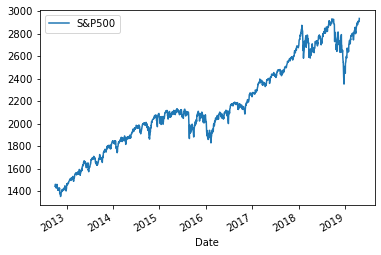

In [3]:
# Reading and dropping dupplicates sp500 and changing Close to S&P500
sp500_historical_csv = Path('Resources/sp500_history.csv')
sp500_historical = pd.read_csv(sp500_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
columns = ['S&P500']
sp500_historical.columns = columns
sp500_historical['S&P500'] = sp500_historical['S&P500'].str.replace('$','').astype(float)
sp500_historical.plot()

In [4]:
# Custom Portfolio Stock Picks
aal_historical_csv = Path('Resources/Stock Portfolio - AAL.csv')
aal_historical = pd.read_csv(aal_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop = ['Company Name']
aal_historical.drop(to_drop, inplace=True, axis=1)

aapl_historical_csv = Path('Resources/Stock Portfolio - AAPL.csv')
aapl_historical = pd.read_csv(aapl_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop2 = ['Company Name']
aapl_historical.drop(to_drop2, inplace=True, axis=1)

ba_historical_csv = Path('Resources/Stock Portfolio - BA.csv')
ba_historical = pd.read_csv(ba_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop3 = ['Company Name']
ba_historical.drop(to_drop3, inplace=True, axis=1)

ccl_historical_csv = Path('Resources/Stock Portfolio - CCL.csv')
ccl_historical = pd.read_csv(ccl_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop4 = ['Company Name']
ccl_historical.drop(to_drop4, inplace=True, axis=1)

ge_historical_csv = Path('Resources/Stock Portfolio - GE.csv')
ge_historical = pd.read_csv(ge_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop5 = ['Company Name']
ge_historical.drop(to_drop5, inplace=True, axis=1)

jblu_historical_csv = Path('Resources/Stock Portfolio - JBLU.csv')
jblu_historical = pd.read_csv(jblu_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop6 = ['Company Name']
jblu_historical.drop(to_drop6, inplace=True, axis=1)

nep_historical_csv = Path('Resources/Stock Portfolio - NEP.csv')
nep_historical = pd.read_csv(nep_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop7 = ['Company Name']
nep_historical.drop(to_drop7, inplace=True, axis=1)

psec_historical_csv = Path('Resources/Stock Portfolio - PSEC.csv')
psec_historical = pd.read_csv(psec_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop8 = ['Company Name']
psec_historical.drop(to_drop8, inplace=True, axis=1)

ual_historical_csv = Path('Resources/Stock Portfolio - UAL.csv')
ual_historical = pd.read_csv(ual_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop9 = ['Company Name']
ual_historical.drop(to_drop9, inplace=True, axis=1)


<AxesSubplot:xlabel='Dates'>

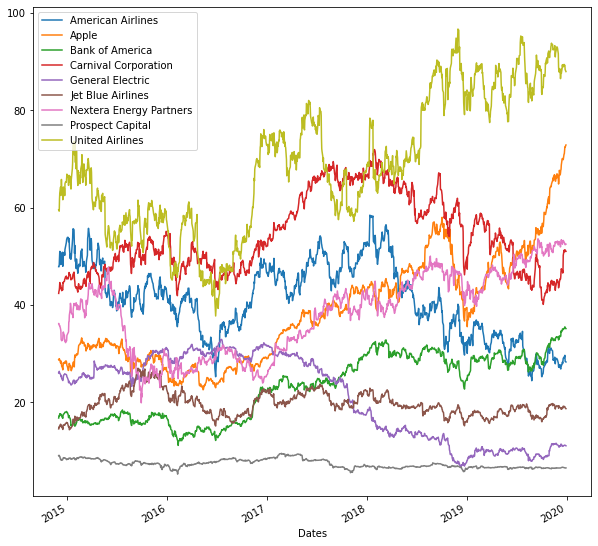

In [5]:
# Combine all stocks into one portfolio
custom_portfolio = pd.concat([aal_historical, aapl_historical, ba_historical, ccl_historical, 
                             ge_historical, jblu_historical, nep_historical, psec_historical, 
                              ual_historical], axis='columns', join='inner')

# Fix columns to match closing prices
columns = ['American Airlines', 'Apple', 'Bank of America', 'Carnival Corporation',
          'General Electric', 'Jet Blue Airlines', 'Nextera Energy Partners',
          'Prospect Capital', 'United Airlines']
custom_portfolio.columns = columns

# Fix index to match sp500 dataset
custom_portfolio.index
date = custom_portfolio.index
date = [x.date().isoformat() for x in date]
dt = np.array(date)

date

custom_portfolio['Dates'] = date
custom_portfolio['Dates'] = pd.to_datetime(custom_portfolio['Dates'], 
                                           infer_datetime_format=True)
custom_portfolio.dtypes
custom_portfolio.set_index('Dates', inplace=True)
custom_portfolio.dtypes
custom_portfolio.plot(figsize=(10,10))

In [6]:
# Calculating returns for both indices and portfolio
custom_returns = custom_portfolio.pct_change()
custom_returns.dropna()

sp500_returns = sp500_historical.pct_change()
sp500_returns.dropna()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


<AxesSubplot:xlabel='Dates'>

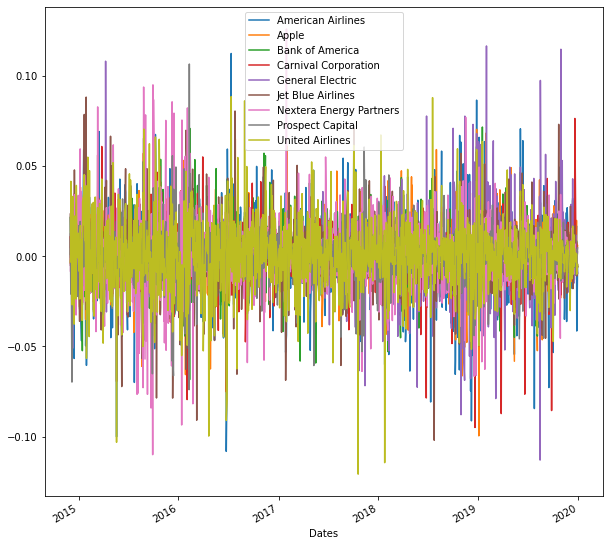

In [7]:
# Plotting returns for each portfolio
custom_returns.plot(figsize=(10,10))

<AxesSubplot:xlabel='Date'>

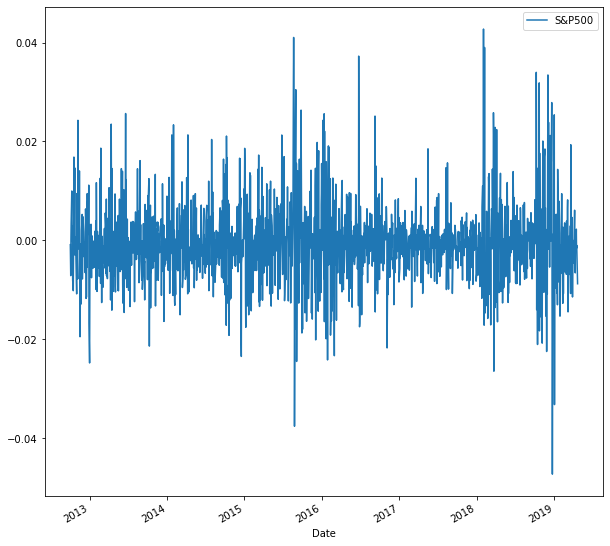

In [8]:
sp500_returns.plot(figsize=(10,10))

In [13]:
# Set weights
weights = [0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]
portfolio_returns = custom_portfolio.dot(weights)

portfolio_returns = portfolio_returns.pct_change()
portfolio_returns.dropna()

Dates
2014-12-02    0.003343
2014-12-03    0.002942
2014-12-04    0.013675
2014-12-05    0.014188
2014-12-08   -0.005225
                ...   
2019-12-23    0.007097
2019-12-24   -0.002131
2019-12-26    0.006351
2019-12-27   -0.007399
2019-12-30   -0.002083
Length: 1278, dtype: float64

In [10]:
# Cumulative returns
cumulative_returns_custom = (1 + portfolio_returns).cumprod()
cumulative_returns_custom.dropna()

Dates
2014-12-01    3.193420e+01
2014-12-02    1.023095e+03
2014-12-03    3.287092e+04
2014-12-04    1.070100e+06
2014-12-05    3.531575e+07
                  ...     
2019-12-23             inf
2019-12-24             inf
2019-12-26             inf
2019-12-27             inf
2019-12-30             inf
Length: 1279, dtype: float64

In [85]:
cumulative_returns_sp500 = (1 + sp500_returns).cumprod()
cumulative_returns_sp500.dropna()

,S&P500
Date,
2019-04-22,0.991236
2019-04-18,0.990234
2019-04-17,0.988673
2019-04-16,0.990926
2019-04-15,0.990422
...,...
2012-10-05,0.497985
2012-10-04,0.498146
2012-10-03,0.494597


<AxesSubplot:>

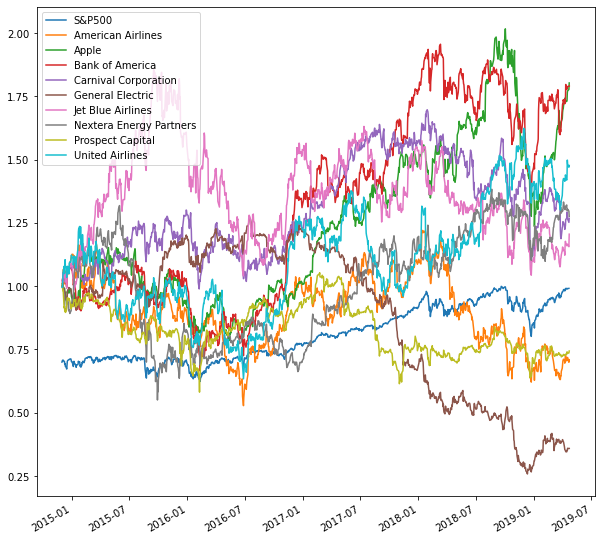

In [86]:
# Showcase comparison data of all returns

cumulative_returns = pd.concat([cumulative_returns_sp500, cumulative_returns_custom], 
                            axis='columns', join='inner')
cumulative_returns.plot(figsize=(10,10))

<AxesSubplot:>

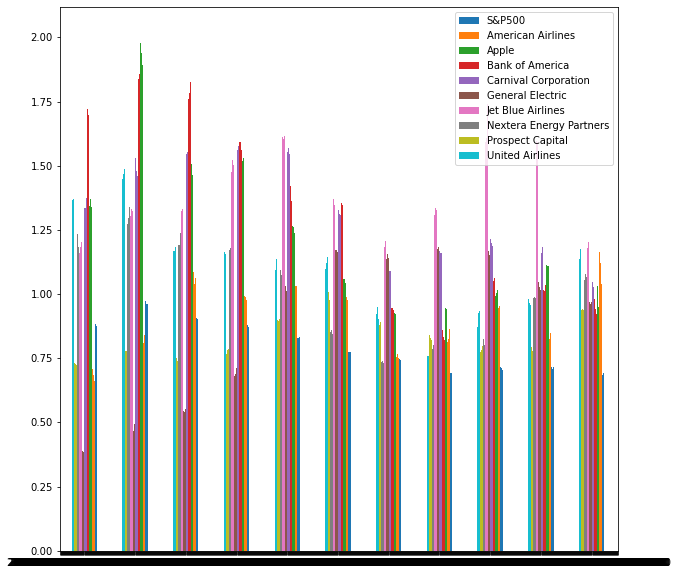

In [88]:
# Annualized Sharpe Ratios
def sharpe(y):
    return np.sqrt(252) * (y.mean() / y.std())

sharpe(cumulative_returns)

# Visualize the sharpe ratios as a bar plot
cumulative_returns.plot.bar(rot=0, figsize=(10,10))

In [101]:
# Standard deviation of cumulative returns
sp500_std = cumulative_returns_sp500.std()
custom_std = cumulative_returns_custom.std()

# Annual standard deviation
sp500_annualstd = sp500_std* np.sqrt(252)
custom_annualstd = custom_std* np.sqrt(252)
custom_annualstd_mean = ((custom_annualstd['American Airlines']+
                        custom_annualstd['Apple']+
                        custom_annualstd['Bank of America']+
                        custom_annualstd['Carnival Corporation']+
                        custom_annualstd['General Electric']+
                        custom_annualstd['Jet Blue Airlines']+
                        custom_annualstd['Nextera Energy Partners']+
                        custom_annualstd['Prospect Capital']+
                        custom_annualstd['United Airlines']) / 9)

print(f'''S&P500 has a risk factor of: 
{sp500_annualstd}. 
While my customized portfolio has a risk factors of: 
{custom_annualstd_mean}''')
      
      

S&P500 has a risk factor of: 
S&P500    2.174109
dtype: float64. 
While my customized portfolio has a risk factors of: 
3.827910957841221
